#Introduction
This is going to be a very basic examples of Linear Regression. Basically, we have generated data of total amount of meals and tips.
We would like to use this historical data to predict the tip for any given amount of bill.

The data is going to be perfect because I just want to show how easy it is to do Linear Regression.

Best example so far I have found to calculate Linear Regression.
http://onlinestatbook.com/2/regression/intro.html
http://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/
https://github.com/mattnedrich/GradientDescentExample

# Importing

In [112]:
%matplotlib inline 
import pandas as pd
import numpy as np
from scipy import stats
import collections

# Generate Data
We are going to generate a 1000 samples of random number between $0 - $100. And let's say that each meal the customer tips 10% of the amount

In [113]:
total_bills = np.random.randint(100, size=1000)
tips = total_bills * 0.10

It's easier if we select the correct X and Y axis. Usually, The Y axis would be the value we want to predict and X would be the feed data.

In [4]:
x = pd.Series(tips, name='tips')
y = pd.Series(total_bills, name='total_bills')

In [5]:
df = pd.concat([x, y], axis=1)

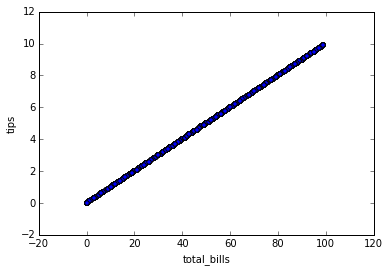

In [6]:
df.plot(kind='scatter', x='total_bills', y='tips');

As we can see from the graph that there's a strong correlation between amount of tip and meal. Now we want to calculate the regression line. We need the slope and intercept to feed in the formula. Y = MX + C

In [43]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x=total_bills, y=tips)
print("slope is %f and intercept is %s" % (slope,intercept))

slope is 0.100000 and intercept is 1.61435309565e-11


Let's say if the customer spent $70 how much the customer will tip

In [8]:
predicted_tips = (slope * 70) + intercept

In [9]:
print('The customer will leave the tip of $%f' % predicted_tips)

The customer will leave the tip of $7.000000


# Large dataset

In [30]:
total_bills = np.random.randint(10000, size=100000000)
tips = total_bills * 0.10
slope, intercept, r_value, p_value, std_err = stats.linregress(x=total_bills, y=tips)
predicted_tips = (slope * 700) + intercept
print('The customer will leave the tip of $%f' % predicted_tips)

The customer will leave the tip of $70.000000


Now, I'm going to use Gradient Decent to find the line

In [16]:
def compute_error_for_line_given_points (b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        totalError += (points[i].y - (m * points[i].x + b)) ** 2
    return totalError / float(len(points))

In [35]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        b_gradient += -(2/N) * (points[i].y - ((m_current*points[i].x) + b_current))
        m_gradient += -(2/N) * points[i].x * (points[i].y - ((m_current * points[i].x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [38]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, points, learning_rate)
    return [b, m]

In [39]:
class point:
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
x = np.random.randint(100, size=1000)
y = x * 0.10

np.column_stack((x,y))

points = []
collections.namedtuple('Point', ['x', 'y'])
for i in range(len(x)):
        points.append(point(x[i],y[i]))

learning_rate = 0.0001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1000
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
print("Running...")
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))


Starting gradient descent at b = 0, m = 0, error = 33.23801000000001
Running...
After 1000 iterations b = 0.0014347376868068164, m = 0.09997837633949364, error = 5.045495702291788e-07


Let's see after 1000 interations how close are we.

In [46]:
gradient_predicted_tips = (m * 70) + b
gradient_predicted_tip

6.9999210814513608

In [110]:
x = np.random.randint(100, size=100000000)
y = x * 0.10

#x = x.reshape(1000, 1)

x = x[:,None]

clf = linear_model.SGDRegressor()
clf.fit(x, y, coef_init=0, intercept_init=0)
    
print("slope is %f and intercept is %s" % (clf.coef_, clf.intercept_[0]))


slope is 0.100000 and intercept is 5.96291499991e-07


In [111]:
clf.predict(70)

array([ 6.9999998])